#  Step 4: Exploring Data

In [1]:
import pandas as pd 
import numpy as np

df=pd.read_csv('mcdonalds.csv')

In [2]:
df.shape

(1453, 15)

In [3]:
df.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


### To get numbers, we store the segmentation variables in a separate matrix, 
#### and convert them from verbal YES/NO to numeric binary

In [4]:
df1 = (df.iloc[:, :11]) # Dataframe to array
df1 = df1.replace({"Yes": 1, "No": 0})
df1
np.round(np.mean(df1, axis=0), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [5]:
# Here, we
# calculate principal components because we use the resulting components to rotate
# and project the data for the perceptual map. We use unstandardised data because our
# segmentation variables are all binary

In [6]:
from sklearn.decomposition import PCA

# Separate the target variable (if applicable)
# y = df['target_variable']
X = df1

# Instantiate a PCA object with the number of components you want to keep
pca = PCA()

# Fit the PCA model to the data
pca.fit(X)

# Transform the data onto the new space
X_pca = pca.transform(X)

# Analyze the results
explained_variance = pca.explained_variance_ratio_
loadings = pca.components_

print("Explained variance:", explained_variance)
print("Loadings:", loadings)



Explained variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Loadings: [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793

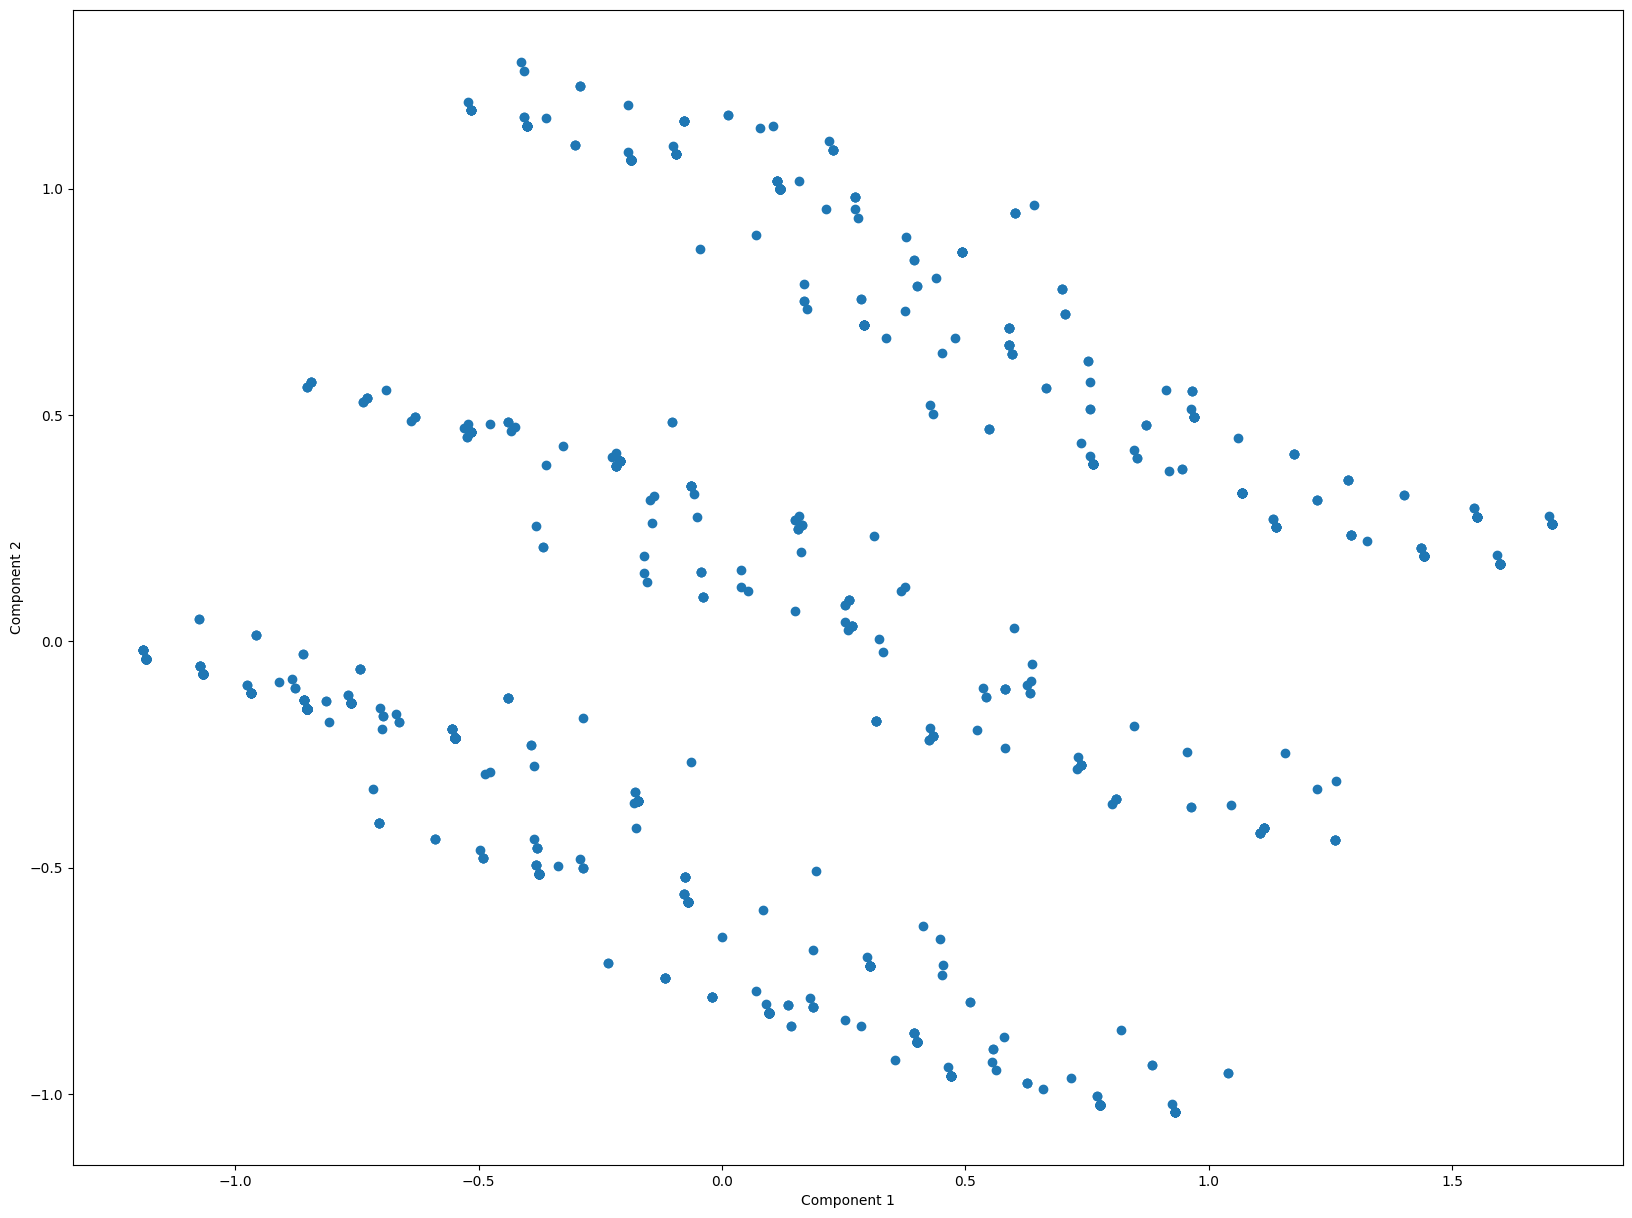

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Instantiate a PCA object with the number of components you want to keep
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data onto the new space
X_pca = pca.transform(X)

# Create a scatter plot of the PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1])


# Add axis labels
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Show the plot
plt.show()


In [8]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming MD.x is a numpy array
MDx_pca = PCA().fit(df1)

print("Proportion of Variance:")
print(MDx_pca.explained_variance_ratio_)
print("\n")

print("Summary of PCA:")
print(pd.DataFrame({'Standard deviation': np.sqrt(MDx_pca.explained_variance_),
                    'Proportion of Variance': MDx_pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(MDx_pca.explained_variance_ratio_)}))


Proportion of Variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


Summary of PCA:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.0

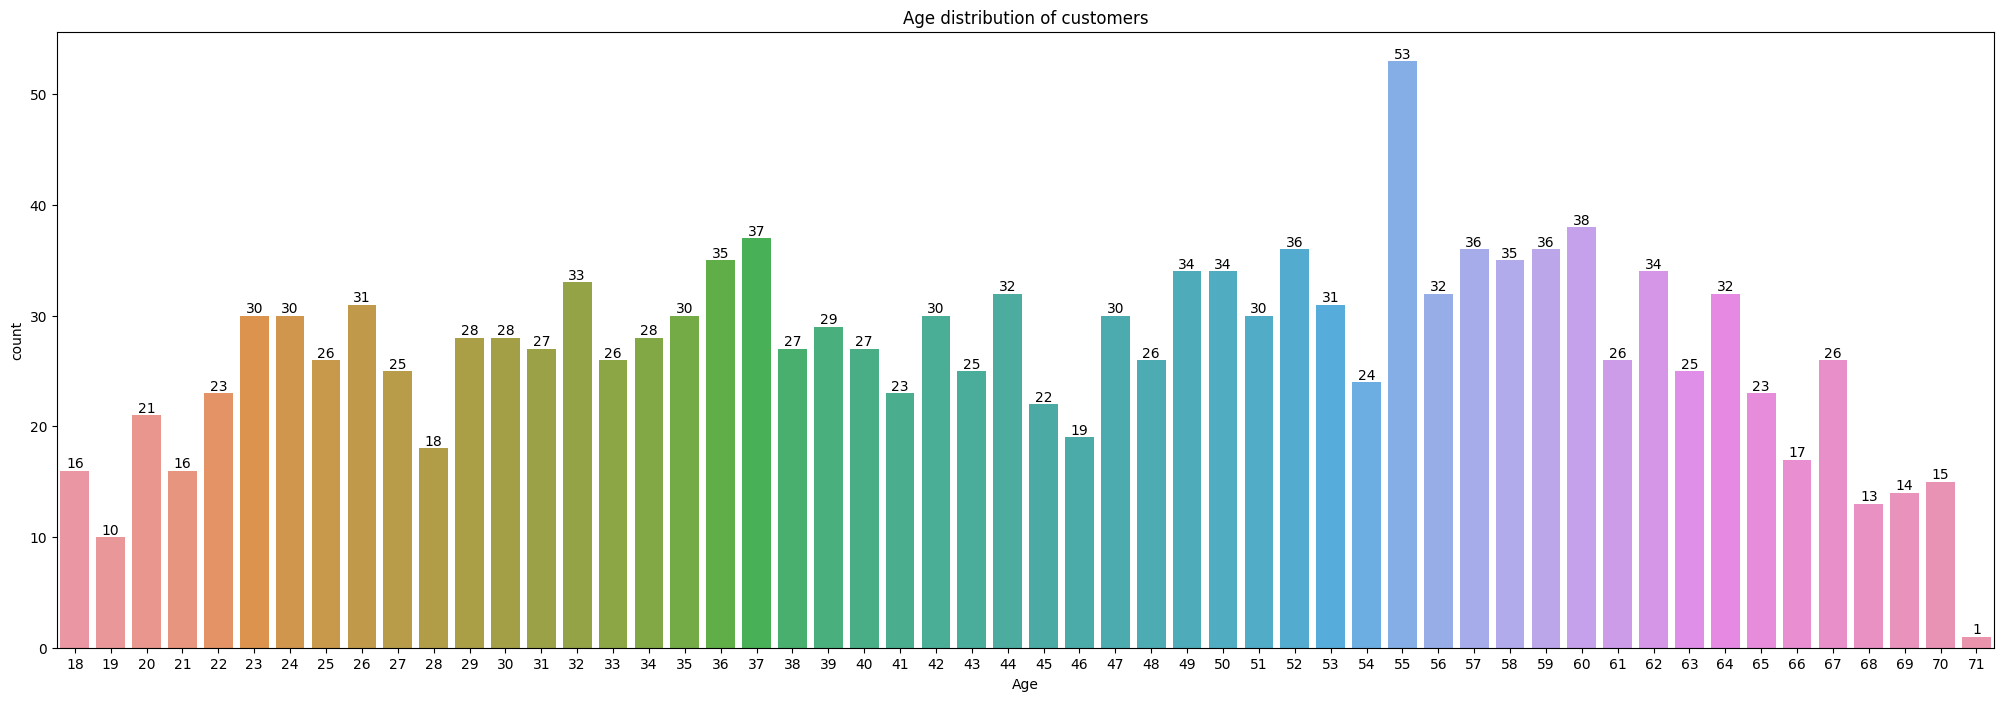

In [9]:
#Age
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df.Age)
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()


In [10]:
#correlation coefficient between original variables and the component

loadings = MDx_pca.components_
num_pc = MDx_pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

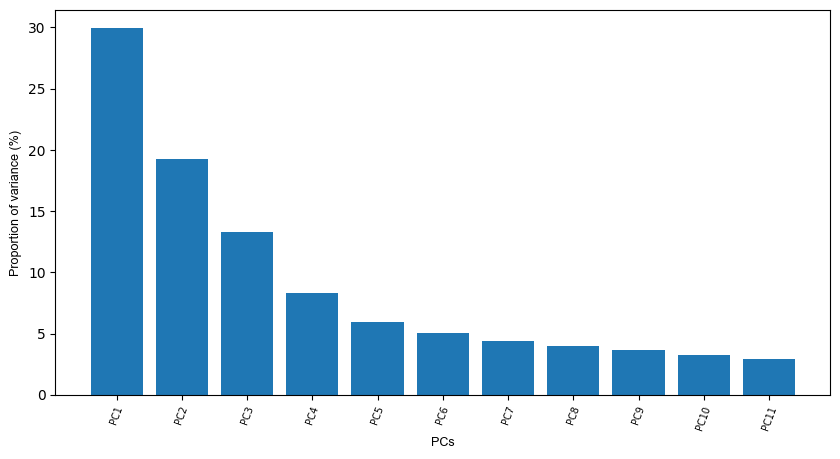

In [12]:
# !pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, MDx_pca.explained_variance_ratio_],show=True,dim=(10,5))

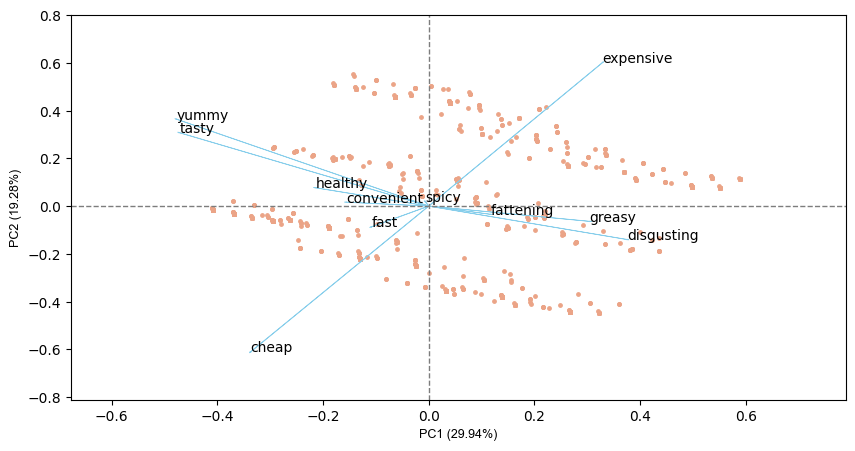

In [13]:

# get PC scores
pca_scores = PCA().fit_transform(df1)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(MDx_pca.explained_variance_ratio_[0]*100, 2),
    var2=round(MDx_pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))



In [14]:

#correlation coefficient between original variables and the component

loadings = MDx_pca.components_
num_pc = MDx_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

c:\Users\spand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


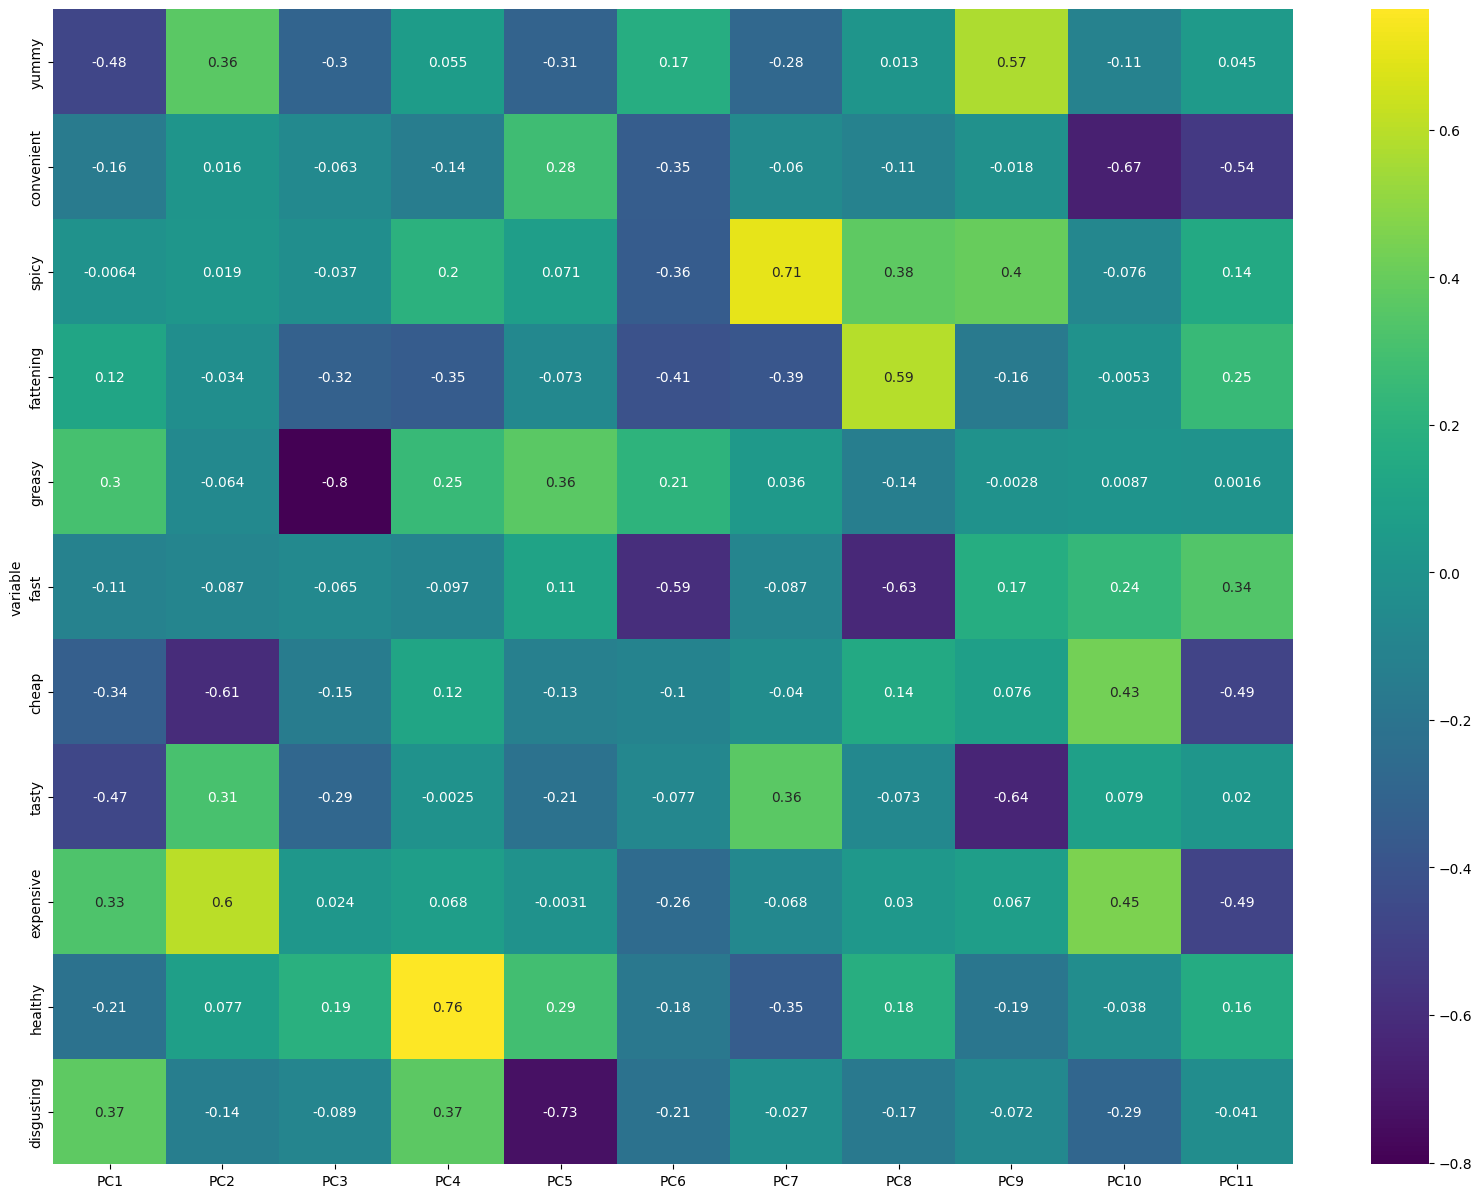

In [15]:
#Correlation matrix plot for loadings 
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.show()

c:\Users\spand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\spand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\spand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\spand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

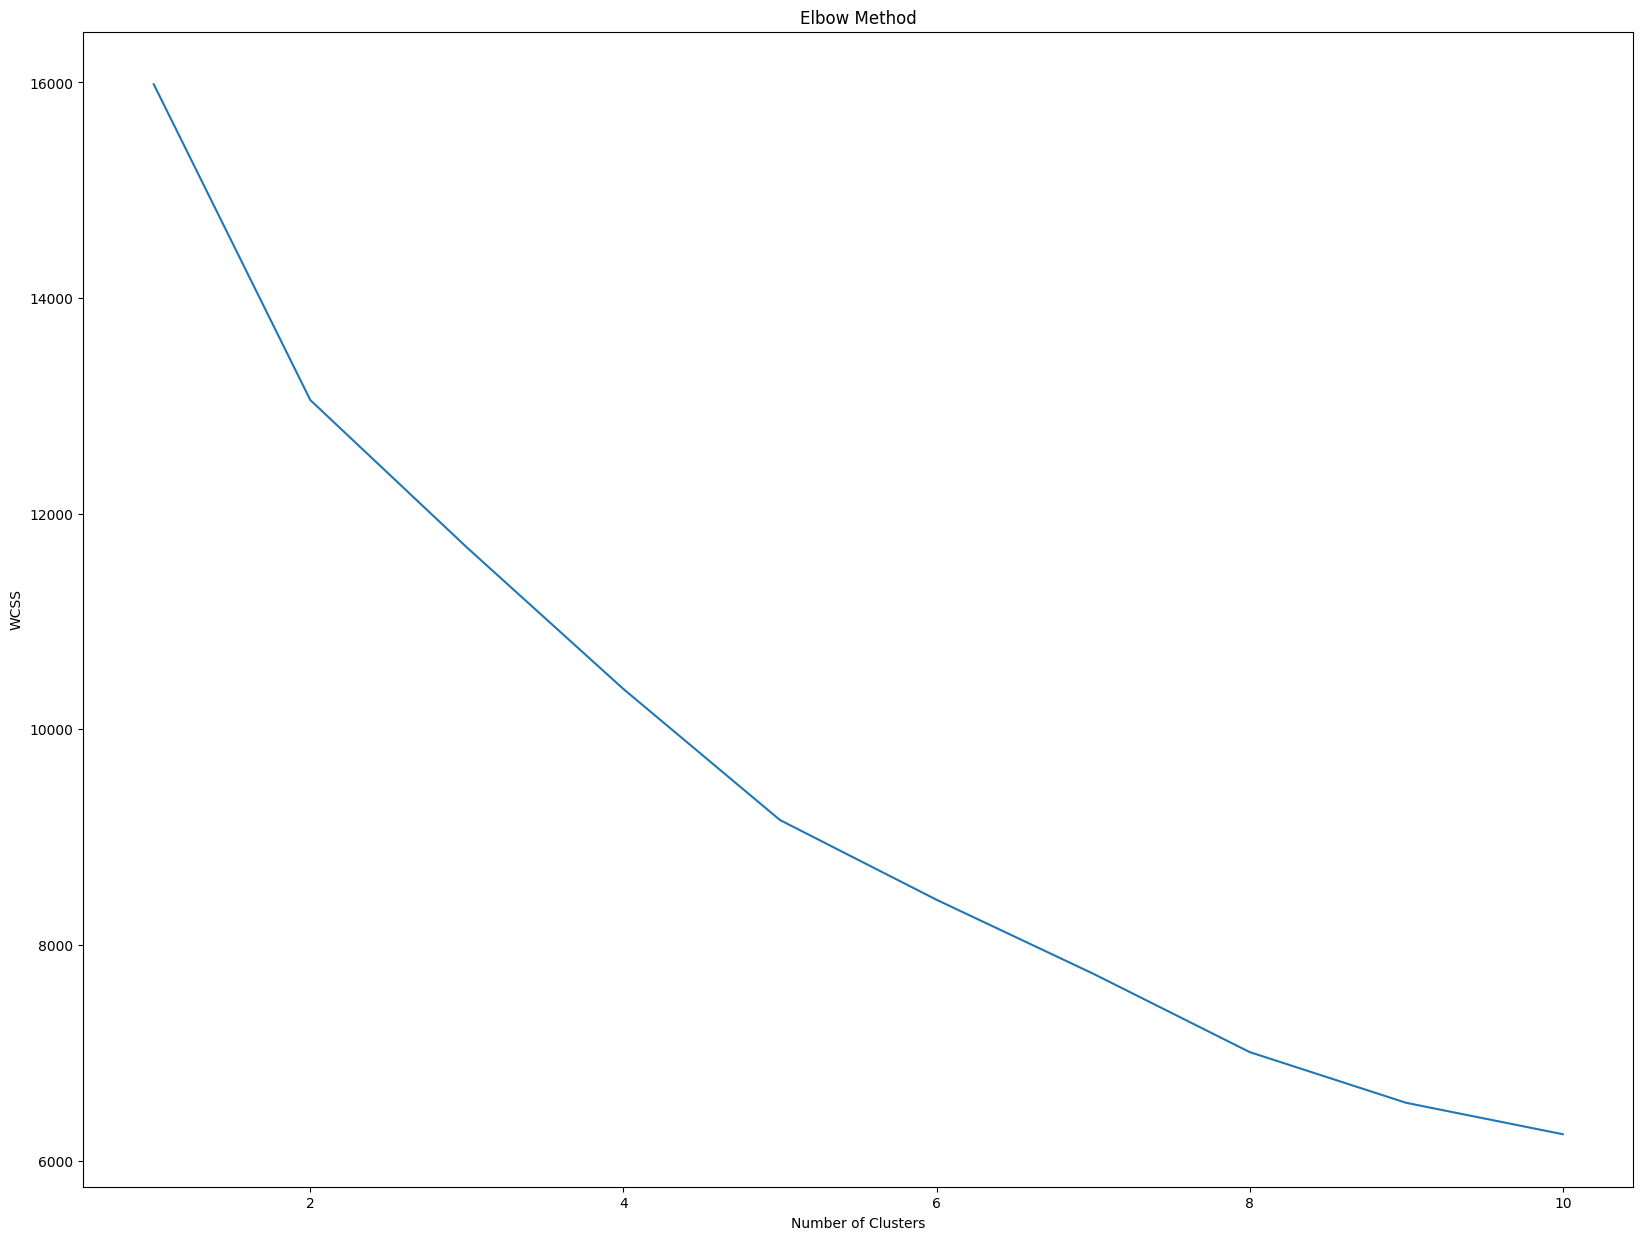

In [23]:

# Step 2: Normalize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df1)

# Step 3: Find the Optimal Number of Clusters (K)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = [] # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


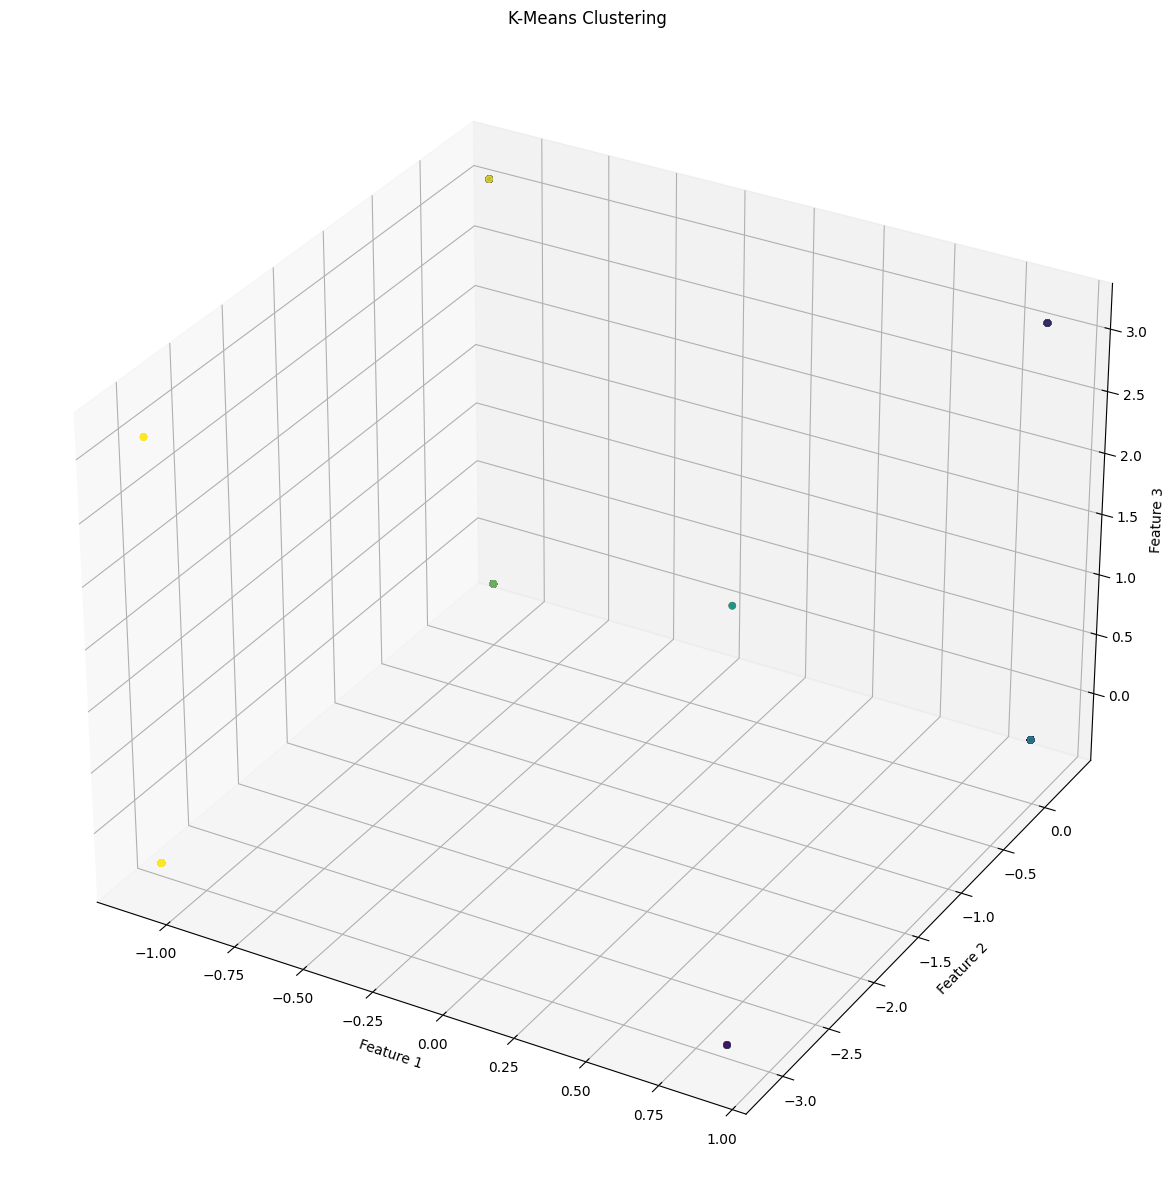

Cluster Means:
               Age
Cluster           
0        40.642424
1        44.820817
2        47.747253


C:\Users\spand\AppData\Local\Temp\ipykernel_5068\2803653455.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


In [24]:

# Step 4: Train the K-Means Model
k = 3 # number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Visualize the Clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# Step 6: Analyze the Clusters
df['Cluster'] = y_kmeans
cluster_means = df.groupby('Cluster').mean()
print('Cluster Means:')
print(cluster_means)
